In [1]:
import numpy as np
import pymbar
import matplotlib.pyplot as plt


# IMPORTANT NOTE
# --------------
# The ELECTROSTATIC part of the energy is defined as an ACTIVATION energy (from zeroed-out charges to full partial charges)
# The VDW part of the energy is defined as a DEACTIVATION energy (from full VDW to zeroed-out VDW)

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.


In [4]:
def extractData(molid, lambdaSchedule, runtype, nbtype, suffix=""):
    # Given molecule id, lambda schedule (list of floats), runtype and nbtype, returns u_nlk and N_k
    if nbtype == "elec":
        prefix = "fep_elec_"
    elif nbtype == "vdw":
        prefix = "fep_noelec_vdw_"

    N_k, u_kln = [], []
    for l in lambdaSchedule:
        fname = f"out/{prefix}{l}.{molid}.{runtype}.dat"
        if suffix != "": 
            fname = f"out/{prefix}{l}.{molid}.{runtype}.{suffix}.dat"
            
        data = np.loadtxt(fname, unpack=True)
        N_k.append(np.shape(data)[1])
        data = np.transpose(data)
        u_kln.append(data)
    u_kln = np.array(u_kln)
    u_kln = np.transpose(u_kln, (0, 2, 1))
    return u_kln, N_k   

def computeFreeEnergy(u_kln, N_k):
    # Uses pymbar to return free energy value
    mbar = pymbar.MBAR(u_kln, N_k)
    mbarres = mbar.compute_free_energy_differences()
    dg = mbarres['Delta_f']
    ddg = mbarres['dDelta_f']
    oldict = mbar.compute_overlap()
    return dg[0][-1], ddg[0][-1], oldict

## Analyze one step 
def analyzeOneCycleStep(run, nbtyp, schedule = [], suffix=""):
    if schedule == []:
        if nbtyp == "elec":
            lambdaschedule = electrostaticSchedule
        elif nbtyp == "vdw":
            lambdaschedule = vdwSchedule
    else:
        lambdaschedule = schedule
    u_kln, N_k = extractData(molid, lambdaschedule, run, nbtyp, suffix)
    dg, ddg, oldict = computeFreeEnergy(u_kln, N_k)
    return dg, ddg, oldict['matrix']



koenigSchedule = [0.0, 0.2878, 0.7782, 0.9141, 0.9658, 0.9872, 0.996, 0.999, 0.9995, 0.9999, 1.]
dg_aq_vdw_koenig, ddg_aq_vdw_koenig, ovlp_aq_vdw_koenig = analyzeOneCycleStep('aq', 'vdw', schedule=koenigSchedule, suffix='koenig')
print(dg_aq_vdw_koenig, ddg_aq_vdw_koenig)

-43.42729882770946 618.3931749513539


In [6]:
## Runs parameters // wont change
electrostaticSchedule = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9, 1.0]
vdwSchedule = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9, .95, .975, .989, .996, 1.0]

## Parameters to be changed one day
molid = 1034539

dg_aq_elec, ddg_aq_elec, ovlp_aq_elec = analyzeOneCycleStep('aq', 'elec') 
dg_aq_vdw, ddg_aq_vdw, ovlp_aq_vdw = analyzeOneCycleStep('aq', 'vdw')
dg_aq_vdw_dbexp, ddg_aq_vdw_dbexp, ovlp_aq_vdw_dbexp = analyzeOneCycleStep('aq', 'vdw', suffix = 'doublexp')
dg_vac_elec, ddg_vac_elec, ovlp_vac_elec = analyzeOneCycleStep('vac', 'elec')
dg_vac_vdw, ddg_vac_vdw, ovlp_vac_vdw = analyzeOneCycleStep('vac', 'vdw')
vdwSchedule = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9, .95, .975, .989, .996, .999,1.0]
dg_aq_vdw_1m, ddg_aq_vdw_1m, ovlp_aq_vdw_1m = analyzeOneCycleStep('aq', 'vdw', suffix='1M')
vdwSchedule = [0.0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, .95, .975,  0.993, .999,1.0]
dg_aq_vdw_newsched, ddg_aq_vdw_newsched, ovlp_aq_vdw_newsched = analyzeOneCycleStep('aq', 'vdw', suffix='newsched')

vdwSchedule = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9, 0.975, 0.997, 0.999, 0.9995, 1.0]
dg_aq_vdw_v2, ddg_aq_vdw_v2, ovlp_aq_vdw_v2 = analyzeOneCycleStep('aq', 'vdw', suffix='v2')
dg_aq_vdw_v2freq, ddg_aq_vdw_v2freq, ovlp_aq_vdw_v2freq = analyzeOneCycleStep('aq', 'vdw', suffix='v2freq')




In [7]:

print(f"Electrostatic activation (AQ) : {dg_aq_elec} +- {ddg_aq_elec}")
print(f"VdW deactivation         (AQ) : {dg_aq_vdw} +- {ddg_aq_vdw} | dbexp: {dg_aq_vdw_dbexp} +- {ddg_aq_vdw_dbexp}")
print(f"VdW deactivation (1M)    (AQ  : {dg_aq_vdw_1m} +- {ddg_aq_vdw_1m}")
print(f"VdW deactivation newsched(AQ) : {dg_aq_vdw_newsched} +- {ddg_aq_vdw_newsched}")
print(f"VdW deactivation      v2 (AQ) : {dg_aq_vdw_v2} +- {ddg_aq_vdw_v2}")
print(f"VdW deactivation freq v2 (AQ) : {dg_aq_vdw_v2freq} +- {ddg_aq_vdw_v2freq}")
print(f"VdW deactivation koenig  (AQ) : {dg_aq_vdw_koenig} +- {ddg_aq_vdw_koenig}")
print(f"Electrostatic activation (VAC): {dg_vac_elec} +- {ddg_vac_elec}")
print(f"VdW deactivation         (VAC): {dg_vac_vdw} +- {ddg_vac_vdw}")




Electrostatic activation (AQ) : 0.8218735001558617 +- 0.07837263909364442
VdW deactivation         (AQ) : -51.86439318967465 +- 0.10471988184525524 | dbexp: -81.59800303738584 +- 0.1367215548942549
VdW deactivation (1M)    (AQ  : -25.5723103212567 +- 0.11807133166105227
VdW deactivation newsched(AQ) : -54.434649573141826 +- 0.141115543080684
VdW deactivation      v2 (AQ) : -56.481277227413614 +- 0.20504023052722453
VdW deactivation freq v2 (AQ) : -56.821388556128674 +- 0.06414079658397018
VdW deactivation koenig  (AQ) : -43.42729882770946 +- 618.3931749513539
Electrostatic activation (VAC): 4.898489412872118 +- 0.004447582012649382
VdW deactivation         (VAC): -28.2360833649226 +- 0.13941055754380802


In [8]:
dgTotal = -dg_aq_vdw + dg_aq_elec + dg_vac_vdw - dg_vac_elec
dgTotalDbexp = -dg_aq_vdw_dbexp + dg_aq_elec + dg_vac_vdw - dg_vac_elec
dgTotal1m = -dg_aq_vdw_1m + dg_aq_elec + dg_vac_vdw - dg_vac_elec
dgTotalnewsched = -dg_aq_vdw_newsched + dg_aq_elec + dg_vac_vdw - dg_vac_elec
dgTotalv2 = -dg_aq_vdw_v2 + dg_aq_elec + dg_vac_vdw - dg_vac_elec
dgTotalKoenig = -dg_aq_vdw_koenig + dg_aq_elec + dg_vac_vdw - dg_vac_elec
print(dgTotal, dgTotalDbexp, dgTotal1m, dgTotalnewsched, dgTotalv2)
print(dgTotalKoenig)

19.551693912035795 49.28530375974698 -6.740388956382157 22.12195029550297 24.168577949774757
11.114599550070599


In [ ]:

# Combine free energy values
# dGHydration = dGac_elec_aq - dG_deac_vdw_aq - 
def getFinalFreeEnergy():
    dg_act_elec_aq = allDg['aq']['elec']
    dg_act_elec_vac = allDg['vac']['elec']
    dg_deact_vdw_aq = allDg['aq']['vdw']
    dg_deact_vdw_vac = allDg['vac']['vdw']
    dg_hydration =  dg_act_elec_aq - dg_deact_vdw_aq - dg_act_elec_vac + dg_deact_vdw_vac
    return dg_hydration

getFinalFreeEnergy()

19.551693912035795

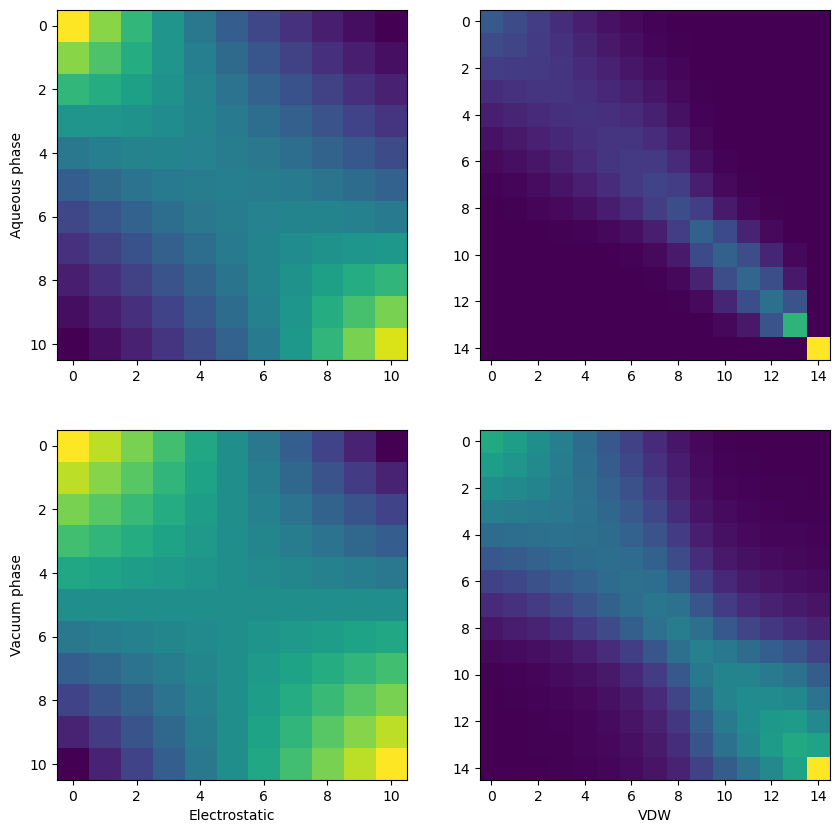

In [139]:
## Print ovlp matrix for a given run/type
def plotOvlp():
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
    for (i,run) in enumerate(['aq', 'vac']) : 
        for (j,nbtype) in enumerate(['elec', 'vdw']):
            ax[i,j].imshow(allOvlp[run][nbtype])
            #ax[i,j].set_title(f"Overlap matrix for {run} phase, {nbtype} activation")
            #ax[i,j].set_colorbar()
    ax[0,0].set_ylabel("Aqueous phase")
    ax[1,0].set_ylabel("Vacuum phase")
    ax[1,0].set_xlabel("Electrostatic")
    ax[1,1].set_xlabel("VDW")

plotOvlp()

In [12]:
print('aq_elec', allDg['aq']['elec'])
print('aq_vdw', allDg['aq']['vdw'])
print('vac_elec', allDg['vac']['elec'])
print('vac_vdw',  allDg['vac']['vdw'])

aq_elec 0.8218735001558617
aq_vdw -51.86439318967465
vac_elec 4.898489412872118
vac_vdw -28.2360833649226


3.780539240661752e-15 1.1005428989238123e-15 0.057859900932579936 1.919392565135324e-15
2.5179962646460524e-08
0.18312416452607877


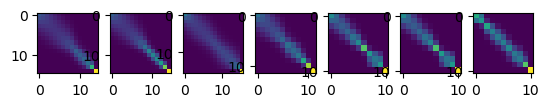

In [10]:
fig, ax = plt.subplots(ncols=7)
ax[0].imshow(ovlp_aq_vdw)
ax[1].imshow(ovlp_aq_vdw_dbexp)
ax[2].imshow(ovlp_aq_vdw_1m)
ax[3].imshow(ovlp_aq_vdw_newsched)
ax[4].imshow(ovlp_aq_vdw_v2)
ax[5].imshow(ovlp_aq_vdw_v2freq)
ax[6].imshow(ovlp_aq_vdw_koenig)

print(ovlp_aq_vdw[-1,-2], ovlp_aq_vdw_dbexp[-1,-2], ovlp_aq_vdw_1m[-1,-2], ovlp_aq_vdw_newsched[-1,-2])
print(ovlp_aq_vdw_koenig[-1,-2])
print(ovlp_vac_vdw[-1,-2])



In [42]:
xrange = np.arange(len(vdwSchedule))
midxpointsrange = xrange[:-1] + 0.5
midlpointsrange = [  0.5*(vdwSchedule[i+1] + vdwSchedule[i]) for i in range(len(vdwSchedule)-1)]
overlaps = [ ovlp_aq_vdw_1m[i,i+1] for i in range(len(vdwSchedule)-1)]
deltaLambdas = [ vdwSchedule[i+1] - vdwSchedule[i] for i in range(len(vdwSchedule)-1)]
print(len(xrange), len(midxpointsrange))
print(len(overlaps), len(deltaLambdas))
print(vdwSchedule)


16 15
15 15
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.989, 0.996, 0.999, 1.0]


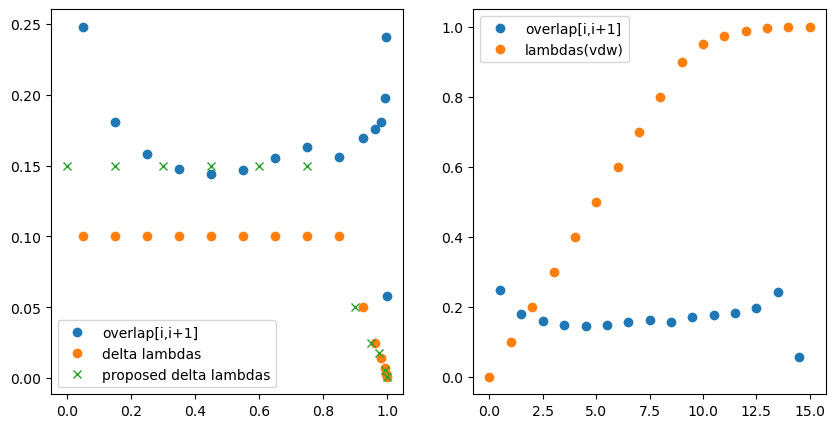

In [48]:
proposedNewvdwSchedule = [0.0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, .95, .975,  0.993, .999,1.0]
proposedNewDeltaLambdaVdwSchedule = [ proposedNewvdwSchedule[i+1] - proposedNewvdwSchedule[i] for i in range(len(proposedNewvdwSchedule)-1)]

fig, ax = plt.subplots(ncols=2, figsize = (10,5))
ax[0].plot(midlpointsrange, overlaps, 'o', label='overlap[i,i+1]')
ax[0].plot(midlpointsrange, deltaLambdas, 'o', label='delta lambdas')
ax[0].plot(proposedNewvdwSchedule[:-1], proposedNewDeltaLambdaVdwSchedule, 'x', label='proposed delta lambdas')
ax[0].legend()

ax[1].plot(midxpointsrange, overlaps, 'o', label='overlap[i,i+1]')
ax[1].plot(vdwSchedule, 'o', label='lambdas(vdw)')
ax[1].legend()

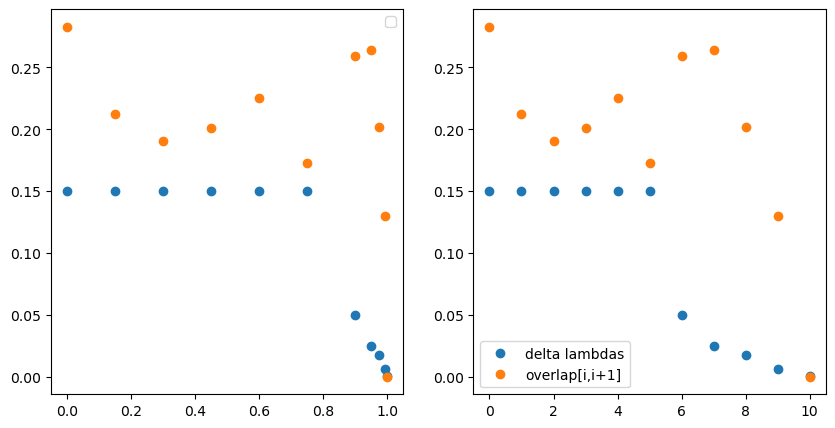

In [71]:
overlaps = [ ovlp_aq_vdw_newsched[i,i+1] for i in range(len(proposedNewvdwSchedule)-1)]
fig, ax = plt.subplots(ncols=2, figsize = (10,5))
ax[0].plot(proposedNewvdwSchedule[:-1], proposedNewDeltaLambdaVdwSchedule,'o')
ax[0].plot(proposedNewvdwSchedule[:-1], overlaps, 'o')
ax[0].legend()
ax[1].plot(range(len(proposedNewvdwSchedule)-1), proposedNewDeltaLambdaVdwSchedule, 'o', label='delta lambdas')
ax[1].plot(range(len(proposedNewvdwSchedule)-1), overlaps, 'o', label='new sched(vdw)')
ax[1].legend()



In [72]:
# Based on newsched, it looks like we could do even sparser on the first steps, but keep last even more dense. Also, 100 frames might not be enough. Let's try to up the sampling frequency to print every 100 frames instead of 1000

newsched
0 0.28290025622276593
1 0.21219348796683346
2 0.19089287360077925
3 0.2007676411565317
4 0.22494133017723936
5 0.1726417401295526
6 0.25915564970976107
7 0.2643901617147492
8 0.20191132885681393
9 0.13003189454321842
10 1.919392565135324e-15


In [75]:
print(proposedNewvdwSchedule)
vdwschedulev2 = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9, 0.975, 0.997, 0.999, 0.9995, 1.0]

[0.0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 0.95, 0.975, 0.993, 0.999, 1.0]


3.7064940760680885e-15 0.3371010216456274


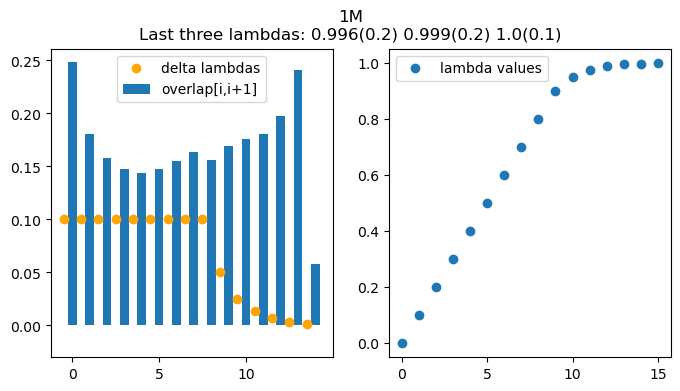

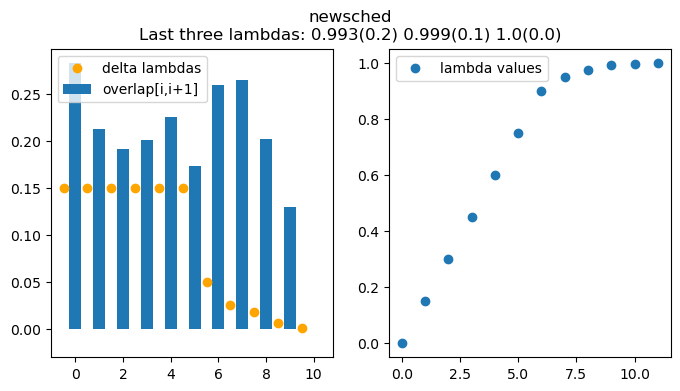

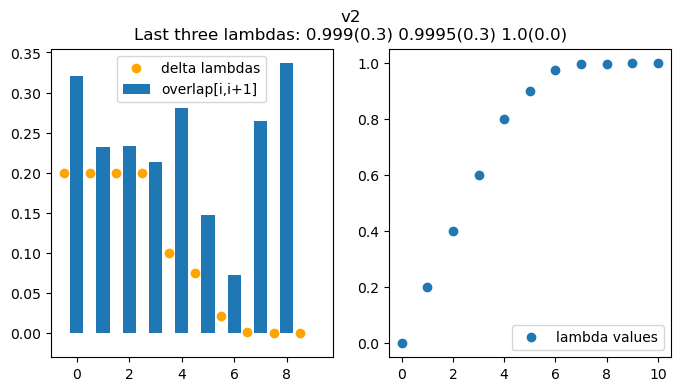

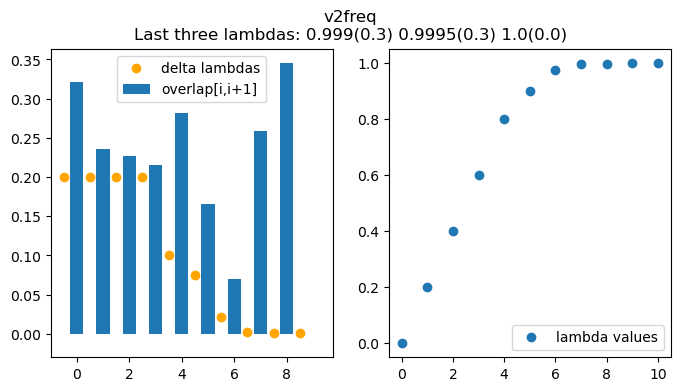

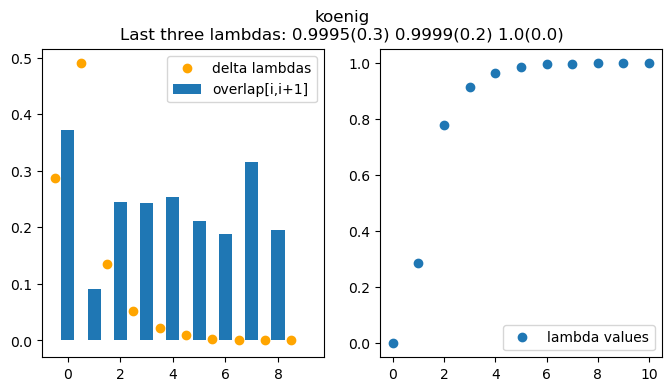

In [143]:
def plotSchedule(vdwSchedule, ovlp, title="Notitle"):
    nLambdas = len(vdwSchedule)
    deltaLambdas = [ vdwSchedule[i+1] - vdwSchedule[i] for i in range(nLambdas-1)]
    deltaLambdas = np.asarray(deltaLambdas)
    midLambdaPoints = [ 0.5*(vdwSchedule[i+1] + vdwSchedule[i]) for i in range(nLambdas-1)]

    overlaps = [ ovlp[i,i+1] for i in range(nLambdas-1)]
    xrange = np.arange(nLambdas)
    fig, ax = plt.subplots(ncols=2, figsize=(8,4))
    ax[0].bar(xrange[:-1], overlaps, width=.5, align='center', label='overlap[i,i+1]')
    ax[0].plot(xrange[:-1] - .5, deltaLambdas, 'o', label='delta lambdas',color='orange')
    ax[0].set_ylim(bottom=-.03)
    ax[0].legend()

    ax[1].plot(xrange, vdwSchedule, 'o', label='lambda values')
    ax[1].legend()
    title = title + f"\nLast three lambdas: {vdwSchedule[-3]}({overlaps[-3]:2.1f})" 
    title += f" {vdwSchedule[-2]}({overlaps[-2]:2.1f}) {vdwSchedule[-1]}({overlaps[-1]:2.1f})"
    fig.suptitle(title)

vdwschedule1m = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9, .95, .975, .989, .996, .999,1.0]
vdwschedulenewsched =  [0.0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, .95, .975,  0.993, .999,1.0]

plotSchedule(vdwschedule1m, ovlp_aq_vdw_1m, title='1M')
print(ovlp_aq_vdw_v2[-1,-2], ovlp_aq_vdw_v2[-2,-3])
plotSchedule(vdwschedulenewsched, ovlp_aq_vdw_newsched, title='newsched')
plotSchedule(vdwschedulev2, ovlp_aq_vdw_v2, title='v2')
plotSchedule(vdwschedulev2, ovlp_aq_vdw_v2freq, title='v2freq')
plotSchedule(koenigSchedule, ovlp_aq_vdw_koenig, title='koenig')